# 1. Instalar bibliotecas Necessárias

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

# 2. Tratar imagens

In [2]:
#Script para converter imagens jpg para jpeg
import os
from PIL import Image

data_dir = 'data'

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            if image.endswith('.jpg'):
            
                img = Image.open(image_path)
                
            
                new_image_path = os.path.splitext(image_path)[0] + '.jpeg'
                
               
                img.save(new_image_path, 'JPEG')
                
                print('Converted file: {} to {}'.format(image_path, new_image_path))
                
             
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Converted file: data\1 - Not Cancer\04-Blog-Dermatite-01.jpg to data\1 - Not Cancer\04-Blog-Dermatite-01.jpeg
Converted file: data\1 - Not Cancer\052c104dd1f575cd52f9ef620e4c7fd2.jpg to data\1 - Not Cancer\052c104dd1f575cd52f9ef620e4c7fd2.jpeg
Converted file: data\1 - Not Cancer\052c104dd1f575cd52f9ef620e4c7fd3.jpg to data\1 - Not Cancer\052c104dd1f575cd52f9ef620e4c7fd3.jpeg
Converted file: data\1 - Not Cancer\052c104dd1f575cd52f9ef620e4c7fd4.jpg to data\1 - Not Cancer\052c104dd1f575cd52f9ef620e4c7fd4.jpeg
Converted file: data\1 - Not Cancer\1-human-skin-science-photo-library.jpg to data\1 - Not Cancer\1-human-skin-science-photo-library.jpeg
Converted file: data\1 - Not Cancer\1000_F_105997620_RH3TYG793nJ678MqNxWH9c6q4c9xfZ7w.jpg to data\1 - Not Cancer\1000_F_105997620_RH3TYG793nJ678MqNxWH9c6q4c9xfZ7w.jpeg
Converted file: data\1 - Not Cancer\1000_F_119898309_3PDIR7pPoC414k5k0yqi1IllU1i2lkOe.jpg to data\1 - Not Cancer\1000_F_119898309_3PDIR7pPoC414k5k0yqi1IllU1i2lkOe.jpeg
Converted file

In [3]:
import cv2
import imghdr

In [4]:
data_dir = 'data' 

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Injetar imagens

In [82]:
import numpy as np
from matplotlib import pyplot as plt

In [87]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1878 files belonging to 2 classes.


In [88]:
data_iterator = data.as_numpy_iterator()

In [89]:
batch = data_iterator.next()

In [90]:
# 0 -> Cancer de pele
# 1 -> Não é cancer
batch[1]

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0])

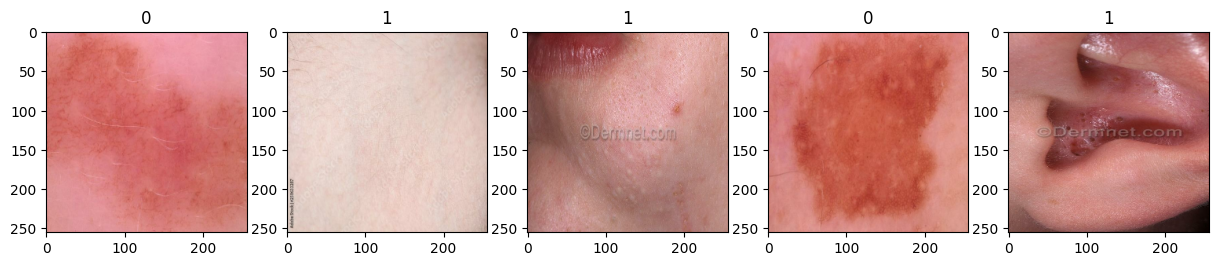

In [91]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Diminuir tamanho das cores da imagem 


In [92]:
data = data.map(lambda x,y: (x/255, y))

In [93]:
data.as_numpy_iterator().next()

(array([[[[0.5716859 , 0.40305847, 0.48148984],
          [0.60227484, 0.43364736, 0.51207876],
          [0.65148926, 0.48286182, 0.5612932 ],
          ...,
          [0.3075887 , 0.22915733, 0.23700047],
          [0.25185046, 0.17341907, 0.18015927],
          [0.22449927, 0.1460679 , 0.14998947]],
 
         [[0.54872495, 0.3800975 , 0.45852888],
          [0.5661444 , 0.39751694, 0.4759483 ],
          [0.6158141 , 0.44718665, 0.525618  ],
          ...,
          [0.25387537, 0.175444  , 0.18328714],
          [0.27562302, 0.19719167, 0.20393187],
          [0.24600543, 0.16757406, 0.17149563]],
 
         [[0.5751642 , 0.40653676, 0.48496813],
          [0.6057624 , 0.43713498, 0.51556635],
          [0.5792648 , 0.41063735, 0.48906872],
          ...,
          [0.26079842, 0.18236706, 0.1902102 ],
          [0.32041445, 0.24198309, 0.24872328],
          [0.23432043, 0.15588905, 0.15981062]],
 
         ...,
 
         [[0.00784314, 0.00784314, 0.00784314],
          [0.00784

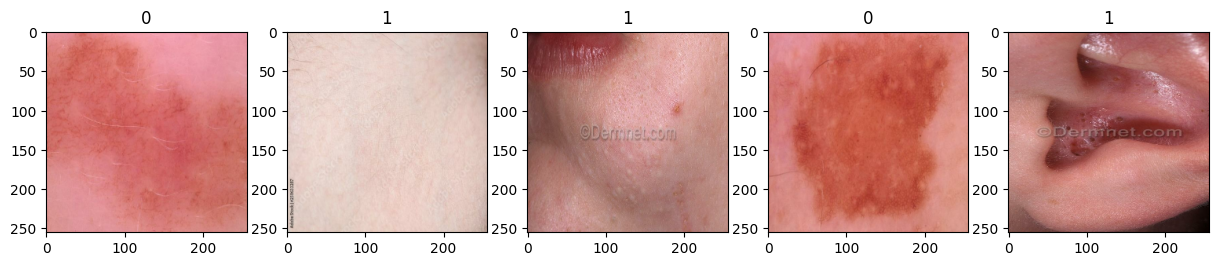

In [94]:
fig, ax = plt.subplots(ncols=5, figsize=(15,15))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 5. Dividir imagens para treinamento, validação e teste

In [95]:
len(data)

59

In [96]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [97]:
test_size

5

In [98]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Criar o modelo de aprendizagem


In [99]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

In [101]:
model = Sequential()

In [102]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), 1, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(16, (3,3), 1, activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

# model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [103]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [104]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

# 7. Treinamento


In [105]:
logdir='logs'

In [106]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [107]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
41/41 [==============================] - 31s 717ms/step - loss: 0.5921 - accuracy: 0.6898 - val_loss: 0.5105 - val_accuracy: 0.7301
Epoch 2/20
41/41 [==============================] - 33s 795ms/step - loss: 0.2914 - accuracy: 0.8727 - val_loss: 0.1763 - val_accuracy: 0.9631
Epoch 3/20
41/41 [==============================] - 32s 780ms/step - loss: 0.1744 - accuracy: 0.9360 - val_loss: 0.1494 - val_accuracy: 0.9403
Epoch 4/20
41/41 [==============================] - 32s 767ms/step - loss: 0.1771 - accuracy: 0.9352 - val_loss: 0.1148 - val_accuracy: 0.9545
Epoch 5/20
41/41 [==============================] - 32s 784ms/step - loss: 0.1328 - accuracy: 0.9512 - val_loss: 0.0687 - val_accuracy: 0.9716
Epoch 6/20
41/41 [==============================] - 32s 784ms/step - loss: 0.1447 - accuracy: 0.9451 - val_loss: 0.1264 - val_accuracy: 0.9517
Epoch 7/20
41/41 [==============================] - 32s 783ms/step - loss: 0.1169 - accuracy: 0.9588 - val_loss: 0.1117 - val_accuracy: 0.9517

# 8. Exibição de graficos de performance

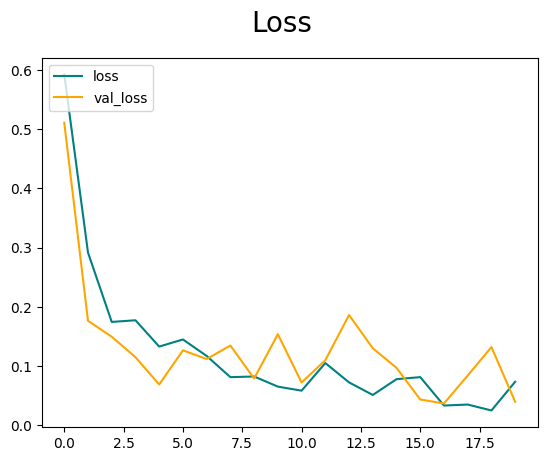

In [108]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

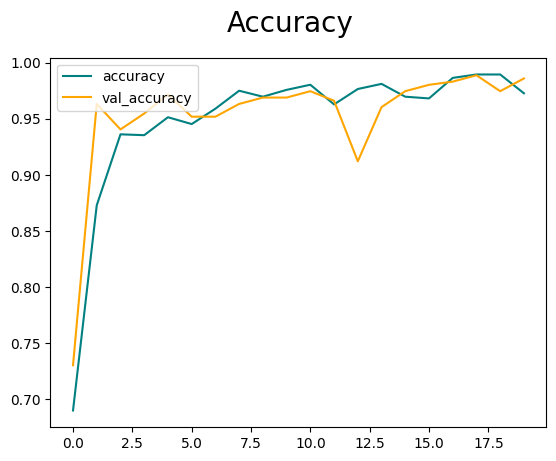

In [109]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Avaliação de performance


In [110]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [111]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [112]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 216ms/step


In [113]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

0.9886364 0.9775281 0.98125


# 10. Teste com imagens


In [114]:
import cv2

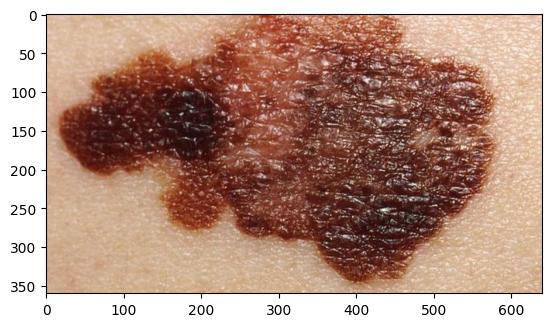

In [155]:
img = cv2.imread('cancerEx2.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

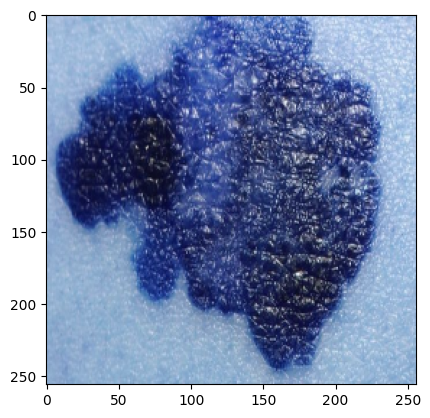

In [156]:
resize = tf.image.resize(img, (256,256))
plt.imshow( resize.numpy().astype(int))
plt.show()

In [157]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 35ms/step


In [158]:
yhat

array([[0.01303908]], dtype=float32)

In [159]:
if yhat > 0.5: 
    print(f'Predicted class is not cancer')
else:
    print(f'Predicted class is cancer')

Predicted class is cancer
